In [41]:
import cv2
import numpy as np
import sys
import time
import warnings
from ultralytics import YOLO
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

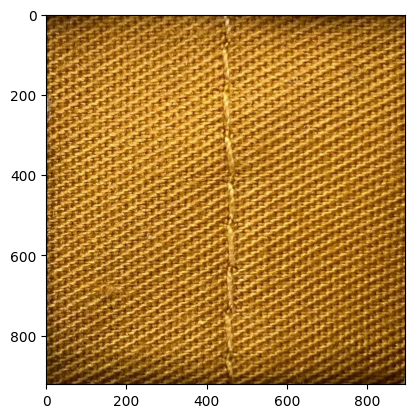

In [42]:
# Load the model with name custome_stitch_detector_model.pt
from os import path

model = YOLO("custom_stitch_detector_model.pt")

path_1 = 'D:\\david\\OneDrive\\Documents\\Future\\Project\\AI\\SticthPatternRecognition'

path_2 = 'dataset\\testing\\1.jpg'

path = path.join(path_1, path_2)

image = cv2.imread(path)							# Load the image based on the path

if image is None:
    print("Failed to load image")   
else:
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)			# Convert the image to RGB (OpenCV uses BGR)

	plt.imshow(image)									# Display the image

In [43]:
# # Apply Gaussian Blur to the image
# image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply the model to the image
output = model.predict(source=path, show=False, hide_labels=True, hide_conf=True, conf=0.2, save=True)

WARNING  'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING  'hide_conf' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_conf' instead.

image 1/1 D:\david\OneDrive\Documents\Future\Project\AI\SticthPatternRecognition\dataset\testing\1.jpg: 640x640 11 stitchs, 20.9ms
Speed: 3.0ms preprocess, 20.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict11


## The Result Is In runs\\segment\\last_predict

In [44]:
# get the model names list
names = model.names
# get the 'car' class id
stitch_id = list(names)[list(names.values()).index('stitch')]
# count 'stitch' objects in the output
result = output[0].boxes.cls.tolist().count(stitch_id)

print(f'Number Of Stitches Detected: {result}')

Number Of Stitches Detected: 11
